In [1]:
#%matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
import sys, os

# Comment this if you don't want to use LaTeX in matplotlib rendering.
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
sys.path.append('C:\\Users\\Seungyun\\CS\\TDA\\Basic\\Gudhi')

In [4]:
from utils import utils_epd as uepd

### Numerical illustration

In [5]:
nb_tot = 10000
prop_noise = 0.001

nb_points = int((1 - prop_noise) * nb_tot)
nb_noise = nb_tot - nb_points

print("Number of point on the shape:", nb_points)
print("Number of points corresponding to noise:", nb_noise)
print("Proportion of noise:", prop_noise)
print("Total number of points:", nb_tot)

Number of point on the shape: 9990
Number of points corresponding to noise: 10
Proportion of noise: 0.001
Total number of points: 10000


In [6]:
# X = sample_torus(nb_points, r1 = 3, r2 = 1)
X = uepd.sample_circle(nb_points)
X_noise = uepd.sample_noise(nb_noise, ndim = X.shape[1], scale = np.std(X), type="uniform")
X_tot = uepd.add_noise(X_noise, X)

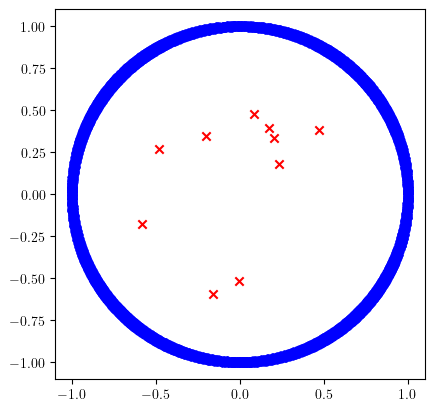

In [7]:
uepd.plot_object(X, X_noise)

In [8]:
dgm_tot = uepd.alphacomplex(X_tot)
dgm_true = uepd.alphacomplex(X)

In [9]:
nb_points_samples = 100
nb_repeat = 100

In [10]:
# Resolution parameters
m=-0.1
M=1.1

In [11]:
diags = uepd.expected_dgm(X_tot, nb_points_samples, nb_repeat)
h = uepd.tohist(diags, m=m, M=M)

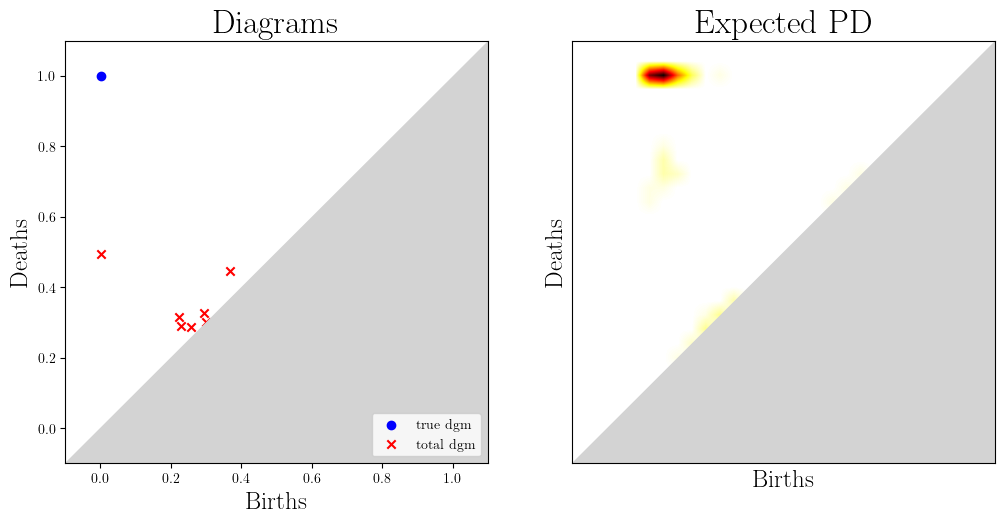

In [12]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
uepd.plot_dgm(dgm_true, dgm_tot, m = m, M=M, ax=ax1)
uepd.plot_hist(h, ax=ax2)